<a href="https://colab.research.google.com/github/khairav/MachinLearning-Mini_Project/blob/main/submission_2_timeseries_LSTM_deni_diana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisis deret waktu terdiri dari metode untuk menganalisis data deret waktu untuk mengekstrak statistik yang berarti dan karakteristik data lainnya. Peramalan deret waktu adalah penggunaan model untuk memprediksi nilai masa depan berdasarkan nilai yang diamati sebelumnya.

Time series banyak digunakan untuk data non stasioner, seperti ekonomi, cuaca, harga saham, dan penjualan retail pada postingan kali ini. Kami akan mendemonstrasikan pendekatan yang berbeda untuk memperkirakan deret waktu penjualan ritel. 

Data yang digunakan Sales superstore

# PREPARE DIRECTORY GOOGLE

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
import os
#!mkdir -p ~/Dicoding
%cd /content/drive/MyDrive/MachineLearningProject/Dicoding
from google.colab import files

uploaded = files.upload()

/content/drive/MyDrive/MachineLearningProject/Dicoding


Saving Sample - Superstore.xls to Sample - Superstore.xls


In [72]:
!ls

'airline delay analysis'  'kaggle (1).json'  'Sample - Superstore.xls'
 Dicoding		   kaggle.json


# import library

In [133]:
import numpy as np
import pandas as pd
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import itertools
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

#import Dataset


In [148]:
#/content/drive/MyDrive/MachineLearningProject/Dicoding/Dicoding/airline delay analysis/20.csv

df = pd.read_excel('Sample - Superstore.xls')
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [149]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [150]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [151]:
df.shape

(9994, 21)

In [ ]:
Ada beberapa kategori dalam data penjualan Superstore, kita mulai dari analisis time series dan forecasting untuk penjualan Teknologi

In [199]:
Technology = df.loc[df['Category'] == 'Technology']

In [200]:
#data penjualan teknologi 4 tahun

Technology['Order Date'].min(), Technology['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

# Check Missing 

In [202]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
Technology.drop(cols, axis=1, inplace=True)
Technology = Technology.sort_values('Order Date')

Technology.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [203]:
Technology = Technology.groupby('Order Date')['Sales'].sum().reset_index()

In [204]:
Technology.head()

,Order Date,Sales
0,2014-01-06,1147.94
1,2014-01-09,31.20
2,2014-01-13,646.74
3,2014-01-15,149.95
4,2014-01-16,124.20


In [205]:
Technology.columns

Index(['Order Date', 'Sales'], dtype='object')

Pengindeksan dengan Data time series

In [206]:
#Indexing with Time Series 
Technology = Technology.set_index('Order Date')
Technology.index

DatetimeIndex(['2014-01-06', '2014-01-09', '2014-01-13', '2014-01-15',
               '2014-01-16', '2014-01-20', '2014-01-26', '2014-02-01',
               '2014-02-02', '2014-02-06',
               ...
               '2017-12-18', '2017-12-21', '2017-12-22', '2017-12-23',
               '2017-12-24', '2017-12-25', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=824, freq=None)

nilai penjualan harian rata-rata untuk bulan itu sebagai penggantinya, dan menggunakan awal setiap bulan sebagai timestamp

In [207]:
y = Technology['Sales'].resample('MS').mean()

In [208]:
#furniture.rename(columns={'Order Date':'Order_Date'}, inplace=True)
Technology = Technology.set_index('Sales')
Technology.index

Float64Index([           1147.94, 31.200000000000003,             646.74,
                          149.95, 124.19999999999999,             699.93,
                          343.33, 468.90000000000003,             180.96,
                          306.56,
              ...
                          149.32, 352.96999999999997,           1503.752,
                          494.97, 3359.9220000000005,            401.208,
                         164.388, 14.850000000000001,            302.376,
                           90.93],
             dtype='float64', name='Sales', length=824)

# VISUALIZATION TIME SERIES

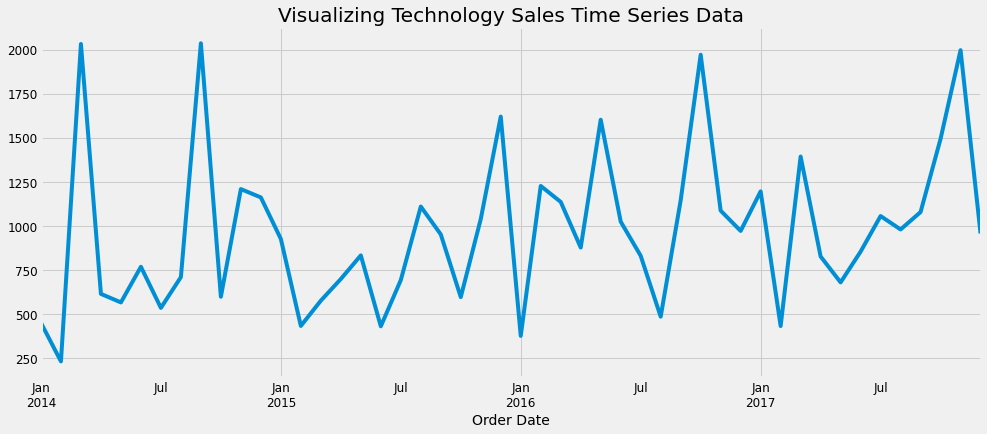

In [209]:
y.plot(figsize=(15, 6))
plt.title("Visualizing Technology Sales Time Series Data")
plt.show()

Visualisasikan data menggunakan metode yang disebut dekomposisi deret waktu yang memungkinkan dekomposisi deret waktu menjadi tiga komponen berbeda: tren, musiman, dan kebisingan

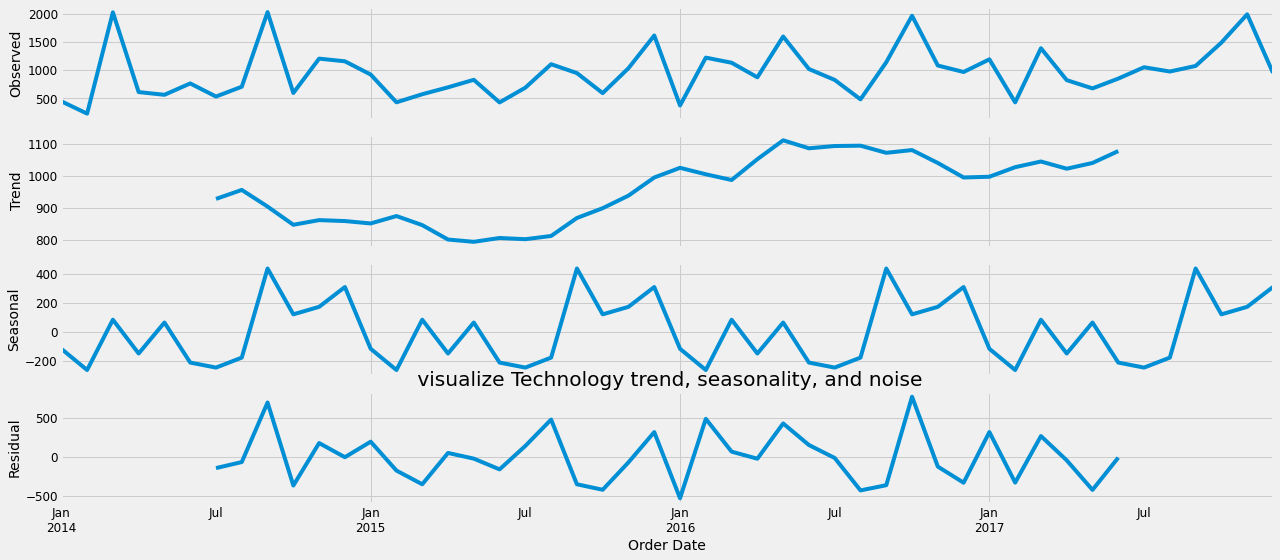

In [210]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.title(" visualize Technology trend, seasonality, and noise")
plt.show()

Plot di atas dengan jelas menunjukkan bahwa penjualan Teknologi tidak stabil.

In [211]:
print(df['Order Date'])

0      2016-11-08
1      2016-11-08
2      2016-06-12
3      2015-10-11
4      2015-10-11
          ...    
9989   2014-01-21
9990   2017-02-26
9991   2017-02-26
9992   2017-02-26
9993   2017-05-04
Name: Order Date, Length: 9994, dtype: datetime64[ns]


In [215]:
df.shape

(9994, 21)

# PROCESSING

In [216]:

# get data values
date = df['Order Date'].values
temp = df['Sales'].values

In [218]:

import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

In [219]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(temp, date, test_size = 0.2, random_state = 0 , shuffle=False)
print(len(x_train), len(x_test))

7995 1999


In [220]:
# model
from keras.layers import Dense, LSTM

data_x_train = windowed_dataset(x_train, window_size=60, batch_size=100, shuffle_buffer=5000)
data_x_test = windowed_dataset(x_test, window_size=60, batch_size=100, shuffle_buffer=5000)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [221]:
valuemax = df['Sales'].max()
print('Max value : ' )
print(valuemax)

Max value : 
22638.48


In [222]:
valuemin = df['Sales'].min()
print('Min Value: ')
print(valuemin)

Min Value: 
0.44399999999999995


In [223]:
i = (valuemax - valuemin) * (10 / 100)
print(i)

2263.8036


In [224]:

# callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')< i):
      self.model.stop_training = True
      print("\nMAE of the model < 10% of data scale")
callbacks = myCallback()

In [225]:
tf.keras.backend.set_floatx('float64')
history = model.fit(data_x_train ,epochs=500, validation_data=data_x_test, callbacks=[callbacks])

Epoch 1/500
80/80 [==============================] - 43s 457ms/step - loss: 233.4969 - mae: 233.9952 - val_loss: 232.2536 - val_mae: 232.7519

MAE of the model < 10% of data scale
